# 1.0 - importando bibliotecas e tabela utilizadas

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix
import numpy as np
import imblearn as imb

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1oQFORyLutSSA_NqokmH7E1Gpt3fZjON2'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './tabela_tratada.csv', 
                                    showsize = True)

tabela_tratada = pd.read_csv("tabela_tratada.csv")

256.0 KiB Done.


In [3]:
#separando os dados:
x_entrada = tabela_tratada[['tumor','nodulo','metastese', 'tempo_de_amamentacao',
                         'fumante', 'alcolatra','primeira_menstruacao',
                       'grau_parentesco_1','grau_parentesco_2', 'grau_parentesco_3',
                       'tipo_tumor', 'idade','ultinfo_1','ultinfo_2','ultinfo_3','ultinfo_4',
                       'subtipo_tumoral']].values
                       
y_saida = tabela_tratada['class_sobrevida'].values

X_train, X_test, Y_train, Y_test = train_test_split(x_entrada, y_saida, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

#2.0 - Testando o Modelo Preditivo#

##**2.1 - Árvore de decisão**

Utilizamos a árvore decisão pois gostaríamos de saber o resultados das séries escolhidas.<br><br>

Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Ela permite prever categorias discretas com base na comparção de elementos pré-selecionados nesse modelo( no caso as features de teste) e retorna uma classificação para essa predição.

### 2.1.1 - Arvore de decisão sem hiper-parâmetros

Em um primeiro momento, foi decidido testar o modelo classificatório sem o uso de hiper-parâmetros, visando observar como os nossos dados tratados interferem no módelo sem qualquer influência de manipulação.

In [4]:
# # Treinando o modelo
model_tree = DecisionTreeClassifier(criterion='entropy', random_state = 42)

model_tree.fit(X_train,Y_train)

# Fazendo as predições
Y_pred_tree = model_tree.predict(X_test)

In [5]:
print('Acc treino: ', model_tree.score(X_train, Y_train ))
print('Acc teste: ', model_tree.score(X_test, Y_test.squeeze() ))
print('Revocação:',recall_score(Y_test,Y_pred_tree,average=None))
print('Precisão:',precision_score(Y_test,Y_pred_tree,average=None))
print('F1_score:',precision_score(Y_test,Y_pred_tree,average=None))

Acc treino:  0.9913584514344971
Acc teste:  0.5431103948428686
Revocação: [0.55896226 0.6097561  0.39690722 0.20408163]
Precisão: [0.5361991  0.6294964  0.385      0.23255814]
F1_score: [0.5361991  0.6294964  0.385      0.23255814]


Decision Tree


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


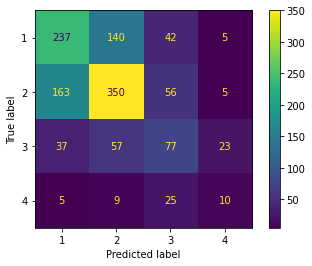

In [6]:
print('Decision Tree')
plot_confusion_matrix(model_tree, X_test, Y_test)  
plt.show()

Como pôde ser percebido,o modelo sem o uso de qualquer hiper parâmetro possui uma acurácia de teste de 45% , indicando uma forte taxa de erro do modelo em cima de predições falso negativas e positivas, visto que a quantidade de desses tipos de erros é inversamente proporcional à pontuação da acurácia.

### 2.1.2-Arvore de decisão com hiper-parâmetro (Grid Search)

Visando buscar melhores resultados para a Árvore de Decisão, foi utilizado a ferramenta de busca de hiper-parâmetros Grid Search, que realiza vários testes com base nos hiper-parâmetros pré-selecionados e retorna o melhor resultado dentre todas essas repetições do modelo.

Dessa forma, decidimos usar testar diferentes valores e características para os seguintes parâmetros:<br><br>

**Criterion**: função utilizada para a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “log_loss” e “entropia” ambos para o ganho de informação de Shannon, que diz que a quantidade de informação de um evento A depende apenas da probabilidade p(A) desse evento, e é tanto maior quanto menor for a probabilidade.

**Splitter**:estratégia utilizada para escolher a divisão em cada nó. As estratégias suportadas são “best” para escolher a melhor divisão e “random” para escolher a melhor divisão aleatória.

**Max_depth**:representa a profundidade máxima da árvores.Se Nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que o número mínimo de amostras.

A seguir, é possível visualizar o código resposnsável pelos testes com os diferentes parâmetros, seguido de sua respectiva pontuação:

In [7]:
from sklearn.model_selection import GridSearchCV
# Cria o GridSearchCV

parameters_tree = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random”'],
    'max_depth':range(2,16,2)
}
grid_tree= GridSearchCV(DecisionTreeClassifier(), parameters_tree)
# Treina os modelos e guarda na variável modelGS o melhor modelo
grid_tree.fit(X_train, Y_train)

modelGS_tree = grid_tree.best_estimator_

y_pred_tree = modelGS_tree.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 381, in fit
    splitter = SPLITTERS[self.splitter](
KeyError: 'random”'

-----------------------------------------

In [8]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.6557117330321339
{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}


In [9]:
print('Acc treino:',modelGS_tree.score(X_train,Y_train))
print('Acc teste:',accuracy_score(Y_test,y_pred_tree.squeeze()))
print('Revocação:',recall_score(Y_test,y_pred_tree,average=None))
print('Precisão:',precision_score(Y_test,y_pred_tree,average=None))
print('F1_score:',f1_score(Y_test,y_pred_tree,average=None))

Acc treino: 0.6657449014863464
Acc teste: 0.6438356164383562
Revocação: [0.75       0.60627178 0.68556701 0.        ]
Precisão: [0.63220676 0.79271071 0.44481605 0.        ]
F1_score: [0.68608414 0.68706811 0.53955375 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Decision Tree


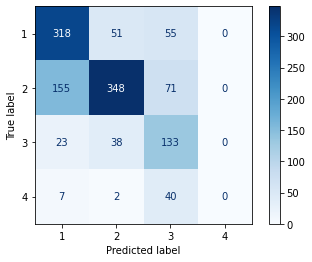

In [10]:
print('Decision Tree')
plot_confusion_matrix(modelGS_tree, X_test, Y_test, cmap='Blues', values_format='.0f');

Como pôde ser visualizado, utilizando dos melhores hiper-parâmetros para o modelo segundo o Grid Search, a acurácia teve um aumento de 17% em relação ao modelo anterior e, visto o aumento da pontuação do recall, que é fortemente influenciado pela quantidade de falsos negativos, acredita-se que esse tipo de dado tenha diminuído de um modelo para  outro.

###2.1.3 -Arvore de decisão com hiper-parâmetro( Randomized Search)

Buscando ainda analisar outros modelos de busca de hiper-parâmetros para servir de comparação com os resultados obtidos, foi o utilizado também o Randomized Search para a busca dos melhores hiper-parâmetros.

Dessa forma, decidimos testar diferentes valores e características para os mesmos parâmetros mencionados acima, utilizando o código a seguir responsável por selecionar os parâmetros para teste e aplicar no modelo :<br><br>



In [11]:
parametros_tree = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random”'],
    'max_depth':range(2,16,2)
}
randomized_search_tree = RandomizedSearchCV(estimator = DecisionTreeClassifier(),param_distributions=parametros_tree)
randomized_search_tree.fit(X_train,Y_train.squeeze())

modelRS_tree= randomized_search_tree.best_estimator_

y_predRS_tree = modelRS_tree.predict(X_test)

accuracy = accuracy_score(Y_test, y_predRS_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

-------------------------------------

In [12]:
print(randomized_search_tree.best_score_)
print(randomized_search_tree.best_params_)

0.6225307922620434
{'splitter': 'best', 'max_depth': 8, 'criterion': 'gini'}


In [13]:
print('Acc treino:',modelRS_tree.score(X_train,Y_train))
print('Acc teste:',modelRS_tree.score(X_test,y_predRS_tree.squeeze()))
print('Revocação:',recall_score(Y_test,y_predRS_tree,average=None))
print('Precisão:',precision_score(Y_test,y_predRS_tree,average=None))
print('F1_score:',precision_score(Y_test,y_predRS_tree,average=None))

Acc treino: 0.717594192879364
Acc teste: 1.0
Revocação: [0.67924528 0.62369338 0.63917526 0.        ]
Precisão: [0.61146497 0.73360656 0.44604317 0.        ]
F1_score: [0.61146497 0.73360656 0.44604317 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Decision Tree


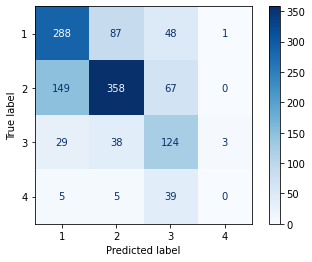

In [14]:
print('Decision Tree')
plot_confusion_matrix(modelRS_tree, X_test, Y_test, cmap='Blues', values_format='.0f');

Como pôde ser visualizado, utilizando os melhores hiper-parâmetros segundo o Randomized Search, o modelo teve um aumento de acurácia surpreendente para 100% , mas que não foi acompanhado com um aumento das outras métricas, indicando a presença de uma forte feature agindo como um elemento viciante para o modelo.

#3.0 - Análise dos resultados

Em um primeiro momento, foi decidido como parâmetro de avaliação de desempenho a acurácia dos modelos de aprendizagem de máquina, visto que essa métrica engloba todas possíveis variáveis de resultado, como os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Dessa forma, com base nos resultados finais obtidos nos testes, conclui-se que o melhor método de aprendizagem de máquina para este projeto até o momento é a Árvore de decisão , com uma acurácia de 64% utilizando as métricas do Grid Search .

Apesar de não ser o ideal, muito pontos foram melhorados para chegar em tal resultado, acreditamos fielmente que a Árvore de Decisão foi o melhor modelo de classificação para o nosso problema e ela possa ser utilizada de forma mais ampla para auxiliar na predição do tempo de sobrevida de cada paciente com Câncer de Mama.

Esse valor indica que , dentre todos os resultados dos testes de predições, o número de valores verdadeiros positivos e negativos para os modelos representam 62% do total, o que sugere uma revisão no tratamentos dos dados de modo a eliminar os falsos positivos e negativos, responsáveis por abaixar essa porcentagem e diminuir a precisão e recall do modelo, o que consequentemente abaixam a acurácia de modo geral.

Ademais, vale ressaltar que foram desconsiderados os resultados de acurácia dos modelos cujo resultado foi igual a 100% sem que esse valor fosse compatível com as outras métricas, indicando o possível vício de treinamento e fortes ruídos em uma ou mais features durante a limpeza e manipulação dos dados.

Em suma, recomenda-se que seja realizada uma revisão no processo de feature engeneering para buscar otimizar ainda mais o resultados para assertividade do modelo, além de avaliar os pesos que cada coluna possui sobre a classificação de cada modelo de treinamento de modo a buscar e eliminar possíveis dados viciantes.

#4.0 - Conclusão

Acreditamos que o tratamento e escolha das features pode ser feito de diversas maneiras, e destacamos que selecionamos uma estratégia de escolha e que o nosso modelo caminha nesta direção de predição. É viável reestruturar a base de dados e rodar novamente as linhas de código para fazer o mesmo tipo de tratamento, apenas mudando o caminho da tabela tratada, isso possivelmente gerará uma melhor acurácia dos modelos, desde que a solução da predição seja a predição do tempo de sobrevida, isso porque em todos os modelos testados os dados plotados já estão encaminhados para o tempo de sobrevida, o filtro de dias em 1, 2, 3 e 4  e o filtro de cores seguem essa regra de negócio.
Juntamente com nosso código, salientamos que este modelo não é uma solução de substituição da mão-de-obra de qualquer funcionário desta ou de outra instituição. Ressaltamos que nosso modelo preditivo tem o foco em aprimorar o trabalho destas pessoas e não substituí-las, tal visto que, além de ser um projeto de Machine Learning, este projeto é um “humanizador de máquinas”, ou seja, não são apenas números que o modelo prediz, mas ele prediz a esperança de dias melhores para cada paciente que é o foco do nosso projeto. Por fim,  este modelo pode e deve ser utilizado e ampliado de forma abrangente para predizer o tempo de sobrevida do paciente com câncer de mama.


#5.0 - Criando filtro de cor

Após a análise dos resultados obtidos e escolha do modelo de classificação que mais se adequa ao projeto de predição do tempo de sobrevida desenvolvido pelo grupo, foi decido montar um breve programa de demonstração da aplicação do modelo preditivo.

Dessa forma, foi criado um programa que, após receber valores para os mesmos dados utilizados para o treinamento do modelo, retorna uma classificação em forma de cores que indicam o grau de risco do paciente com base em sua sobrevida predita pela máquina.Sendo assim, obtem-se como resposta a cor verde para representar pacientes com alto índice de sobrevida( quartil 4), laranja prara médio tempod de sobrevida( quartis 2 e 3) e vermelho para baixo tempo de sobrevida( quartil 1)

Nas células de códigdo a seguir é possível visualizar o código utilizado para a criação desse modelo, bem como uma aplicação de seu funcionamento com base em dados estipulados apenas para exemplificação e visualização do resultado obtido.

In [15]:
#Dados com MÉDIO tempo de sobrevida, ou seja, resultado = 2
tumor = 4
nodulo = 1
metastese = 0
tempo_de_amamentacao = 4
fumante = 1
alcolatra = 1
primeira_menstruacao = 0
grau_parentesco_1 = 0
grau_parentesco_2 = 0
grau_parentesco_3 = 0
tipo_tumor = 4
idade = 74
ultinfo_1 = 1
ultinfo_2 = 0
ultinfo_3 = 0
ultinfo_4 = 0
subtipo_tumoral = 1

In [16]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

features = np.array([[tumor, nodulo,	metastese,	tempo_de_amamentacao,	fumante,	alcolatra,	primeira_menstruacao,
                      grau_parentesco_1,	grau_parentesco_2, grau_parentesco_3,	tipo_tumor,	idade, ultinfo_1,
                      ultinfo_2, ultinfo_3, ultinfo_4, subtipo_tumoral]])
prediction = modelRS_tree.predict(features)
prediction

array([2])

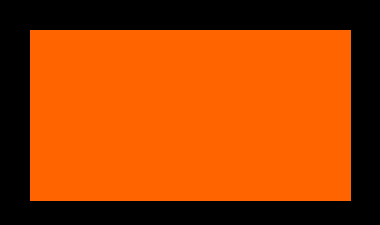


           Médio tempo de sobrevida.           


In [17]:
if prediction == 1:
  # # Criando uma imagem preta para servir de fundo
  img = np.zeros((225, 380, 3), dtype = "uint8")
  
  # Criando um retângulo vermelho
  cv2.rectangle(img, (30, 30), (350, 200), (0, 0, 255), -1)
    
  cv2_imshow(img)
  print('')
  text = 'Pouco tempo de sobrevida.'
  text = text.center(47, ' ')
  print(text)

elif prediction == 2:
  # Criando uma imagem preta para servir de fundo
  img = np.zeros((225, 380, 3), dtype = "uint8")
  
  # Criando um retângulo vermelho
  cv2.rectangle(img, (30, 30), (350, 200), (0, 100, 255), -1)
    
  cv2_imshow(img)
  print('')
  text = 'Médio tempo de sobrevida.'
  text = text.center(47, ' ')
  print(text)

elif prediction == 3:
  # Criando uma imagem preta para servir de fundo
  img = np.zeros((225, 380, 3), dtype = "uint8")
  
  # Criando um retângulo vermelho
  cv2.rectangle(img, (30, 30), (350, 200), (0, 100, 255), -1)
    
  cv2_imshow(img)
  print('')
  text = 'Médio tempo de sobrevida.'
  text = text.center(47, ' ')
  print(text)

else:
  # Criando uma imagem preta para servir de fundo
  img = np.zeros((220, 380, 3), dtype = "uint8")
  
  # Criando um retângulo verde
  cv2.rectangle(img, (20, 20), (350, 200), (0, 255, 0), -1)
    
  cv2_imshow(img)
  print('')
  text = 'Alto tempo de sobrevida'
  text = text.center(47, ' ')
  print(text)